# ***深度学习入门：基于python的理论和实践***

## ***第七章：卷积神经网络***

第七章主要讲述了卷积神经网络(**$Convolutional  Neural  Network$**)的整体框架

### **7.1 整体结构**

$CNN$对比于$Affine$层，最主要的区别在于$CNN$的隐藏层为$Conv \rightarrow ReLu \rightarrow Pooling$

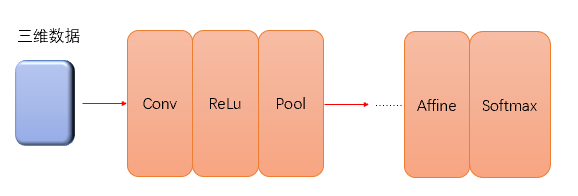

### **7.2卷积层**

卷积层($Conv$)是进行卷积运算的层，主要是对三维数据进行**下采样**

### **7.2.1 全连接层存在的问题**

全连接层的输入是一维的，例如处理$Mnist$数据集时得先转化为大小$(784,)$的数据$\rightarrow$

In [ ]:
network=TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

但是将三维数据一维化容易丧失原始数据中的**空间信息**，比如$RGB$三个波段之间的信息，像素与像素之间的信息

而$CNN$能够接收三维信息并传递三维信息，能够在特征提取中考虑原始数据的空间信息

$Input    Feature     Map \rightarrow Output     Feature      Map$

### **7.2.2 卷积运算**

卷积运算类似于数字图像处理中的“**滤波运算**”，**卷积核**对应着滤波器,$RGB$三个通道可以有三个不同的卷积核。除此之外$Conv$还包括偏置

$(6,6)   *   (3,3) \rightarrow (4,4)$是输入数据与输出数据对应的**大小变化**$\rightarrow$

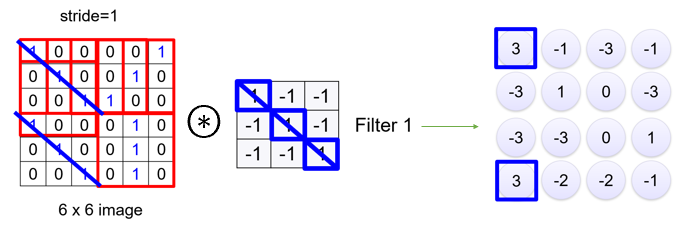

### **7.2.3 填充**

“填充”(**$Padding$**)目的是为了**调节输出数据**的大小，防止下采样过度

$\begin{matrix} 1 & 2 \\ 3 & 4 \\ \end{matrix}  \space\space\space\space\space   \text{Padding} \space\space\space\space\space\begin{matrix} 0 & 0 & 0 & 0 \\ 0 & 1 & 2 & 0 \\ 0 & 3 & 4 & 0\\0 & 0 &  0 & 0 \end{matrix}$

**$Padding$**的值可以设置为**任意整数**

### **7.2.4 步幅**

步幅$stride$是卷积核每做一次卷积时移动的间隔数，例如$stride$为1或2$\rightarrow$

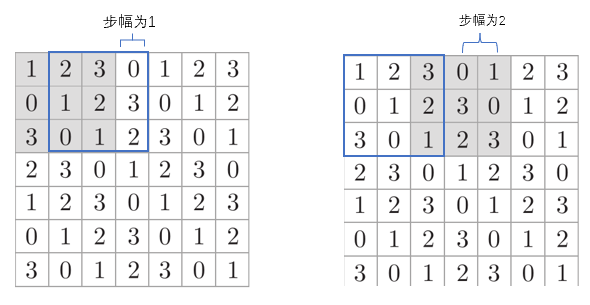

综合$Padding$和$stride$,输出数据的大小主要受这两个变量的影响

$Input \space Feature.shape=(H,W)$<br><br>
$Output \space Feature.shape=(OH,OW)$<br><br>
$Filter.shape=(FH,FW)$<br><br>
$Padding=P$<br><br>
$Stride=S$

$$
\bbox[#9ff, 5px]{ 
    OH=\frac{H+2P-FH}{S}+1
}
$$


$$
\bbox[#9ff, 5px]{ 
    OW=\frac{W+2P-FW}{S}+1
}
$$

式子中的$OH$和$OW$必须是在整数的情况下，因此需要调整合适的$Padding$和$Stride$

### **7.2.5 三维数据的卷积运算**

以一个$RGB$三通道的图像为输入，需要对应有**$3$**个相同大小但是不相等的卷积核做卷积运算$\rightarrow$

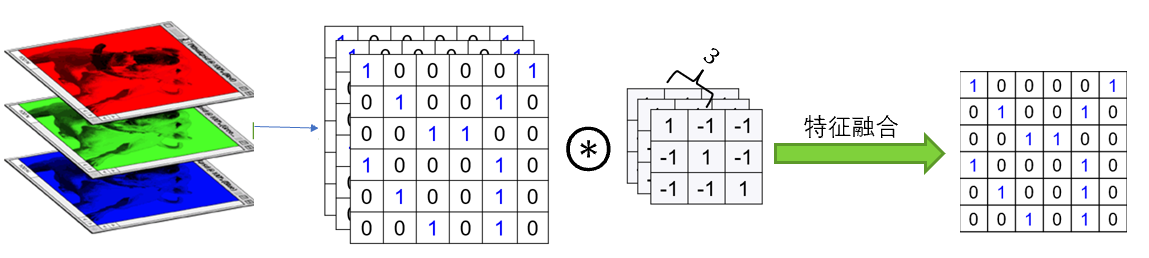

$3$个波段的图像分别经过卷积后有三幅$Feature   Map$最终的$Feature   Map$取决于三幅图像的特征聚合

卷积核的**数量**应该与**原始图像通道数**相等，大小没有限制

### **7.2.6 结合方块思考**

“方块”的含义体现$CNN$处理数据的格式

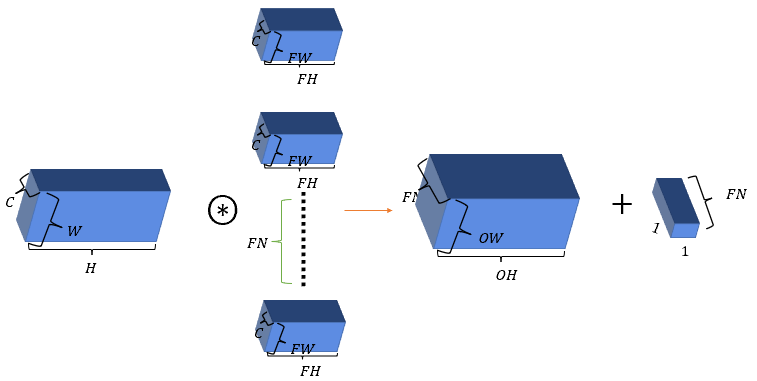

当滤波器是四维的时候，即有**多个多通道滤波器**，这时的$FeatureMap$是三维的，同时还有偏置这一项

$Input(C,H,W)\space*Filters(FN,C,FH,FW)\rightarrow Feature(FN,OH,OW)  +Bias(FN,1,1)\rightarrow Output(FN,OH,OW)$

### **7.2.7 批处理**

$Mini-batch$是将多个三维数据打包后同时处理，能够实现CNN处理数据的高效化

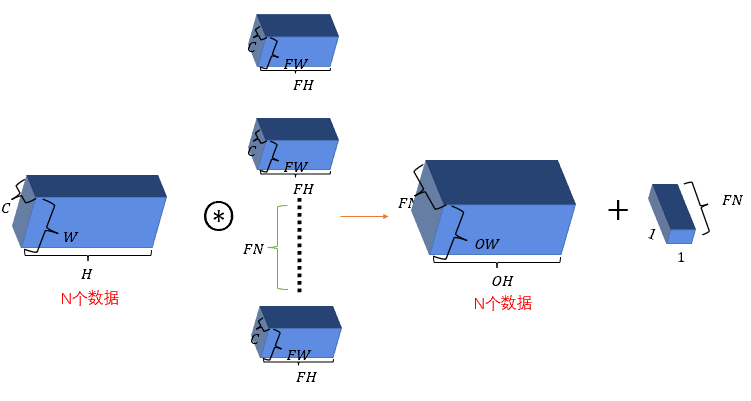

$Input(C,H,W) \rightarrow Input(N,C,H,W)$

$Feature(FN,OH,OW) \rightarrow Feature(N,FN,OH,OW)$

$Output(FN,OH,OW) \rightarrow Output(N,FN,OH,OW)$

### **7.4 卷积层和池化层的实现**

### **7.4.1 四维数组**

数据在$CNN$中的传递是四维的，具体是$batchNum\space height\space width \space channel$

比如有**10**个长为**28**宽为**28**的**1**通道的数据表示$\Rightarrow$

In [3]:
import numpy as np
x=np.random.rand(10,1,28,28)
print(x)
print(x.shape)

[[[[0.39644259 0.40790096 0.26189124 ... 0.81597248 0.4793633
    0.78784241]
   [0.95997709 0.96522387 0.28347524 ... 0.17709531 0.99356016
    0.23946034]
   [0.36908451 0.75855813 0.69154918 ... 0.0174545  0.75363363
    0.9570255 ]
   ...
   [0.58975907 0.94847182 0.3204293  ... 0.85747593 0.09610672
    0.90272233]
   [0.58303305 0.46882521 0.99269825 ... 0.05715793 0.26573439
    0.74727214]
   [0.0754797  0.87386386 0.50181692 ... 0.80701207 0.5904252
    0.91270009]]]


 [[[0.74226328 0.12344133 0.16116741 ... 0.40681589 0.10939544
    0.70220375]
   [0.88949365 0.68931208 0.83423644 ... 0.83922397 0.75704548
    0.77179948]
   [0.55936    0.36326576 0.33816587 ... 0.32591623 0.07577068
    0.94184245]
   ...
   [0.02300665 0.99943595 0.20300412 ... 0.13135214 0.95024637
    0.21708573]
   [0.41681388 0.8555554  0.8120578  ... 0.13329903 0.94840488
    0.17040664]
   [0.65750418 0.87739941 0.9358766  ... 0.21702254 0.50925072
    0.51692116]]]


 [[[0.02354159 0.63477633 0.2203

由$numpy$的数据类型可以看出是**四维数据**

访问第一个数据的第一个通道情况$\Rightarrow$

In [4]:
import numpy as np
x=np.random.rand(10,1,28,28)
print(x[0,0,:,:])

[[0.9689242  0.23611058 0.22420337 0.46307312 0.09213546 0.83182919
  0.89837412 0.44319615 0.13442511 0.83659664 0.76241521 0.04315043
  0.63662302 0.63258267 0.85327057 0.18671414 0.53647395 0.06602945
  0.36447577 0.31334336 0.52512131 0.62262709 0.84564547 0.56210916
  0.0018527  0.43690062 0.37120123 0.49717081]
 [0.2530572  0.62820901 0.35666832 0.38628549 0.27780432 0.17965437
  0.72856758 0.20993653 0.91598221 0.70377145 0.0711446  0.19624319
  0.32949238 0.51575361 0.80590431 0.10008623 0.44922494 0.9281864
  0.78345886 0.42458636 0.82877377 0.88694041 0.73931975 0.25493844
  0.27034431 0.70698828 0.44185825 0.20468798]
 [0.69343006 0.72570244 0.83412791 0.11055755 0.7129134  0.67541243
  0.80732558 0.43096893 0.7807791  0.60945475 0.28773403 0.54977315
  0.75980011 0.21437013 0.21648374 0.76100183 0.6798953  0.86523121
  0.31996155 0.17751565 0.7625513  0.45870758 0.5067449  0.21394803
  0.95273003 0.05351802 0.36160277 0.10757008]
 [0.30649937 0.62765688 0.9202291  0.9853803

### **7.4.2 基于$im2col$的展开**

$im2col$$\rightarrow$"$image\space\space to\space\space colum$"，是一个将**图像**转化为**矩阵**的一个函数，同时也能将**卷积核**展开成一个矩阵

相比于$numpy$的$for$要更快

输入数据分批横向展开(四维),卷积核按序纵向展开$\Rightarrow$

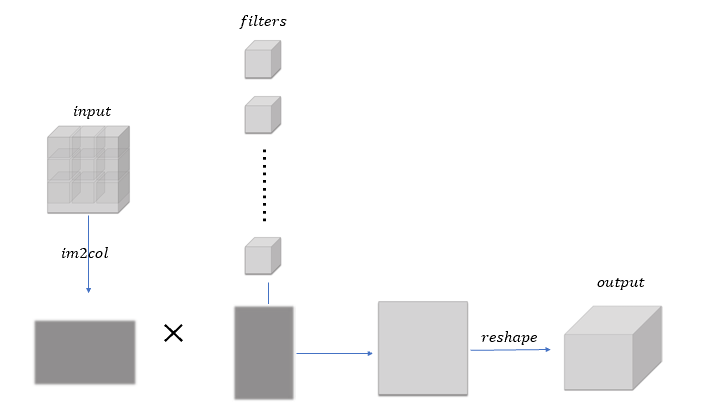

### **7.4.3 卷积层的实现**

使用$im2col$来实现卷积层$\Rightarrow$

In [ ]:
class Convolution:
    from util import im2col
    import numpy as np
    def __init__(self,W,b,stride=1,pad=0):#滤波器的大小
        self.W=W
        self.b=b
        self.stride=stride
        self.pad=pad
    def forward(self,x):#x是输入数据
        FN,C,FH,FW=self.W.shape#滤波器的四维信息
        N,C,H,W=x.shape#输入信息的四维信息
        out_h=int(1+(H+2*self.pad-FH)/self.stride)#根据上面的公式
        out_w=int(1+(W+2*self.pad-FW)/self.stride)
        col=im2col(x,FH,FW,self.stride,self.pad)#将输入数据展开
        col_W=self.W.reshape(FN,-1).T#滤波器的展开
        out=np.dot(col,col_W)+self.b#矩阵运算
        out=out.reshape(N,out_h,out_w,-1).transpose(0,3,1,2)
        return out   

在$reshape$输出结果之后，需要改变不同维度上的意义：$transpose:\space (N,H,W,C)\rightarrow (N,C,H,W)$

### **7.4.4 池化层的实现**

池化层和卷积层一样需要使用到$im2col$，但是卷积层是3个通道同时进行，但是池化层需要三个**通道独立**

池化的输入是建立在卷积后的基础上$\Rightarrow$

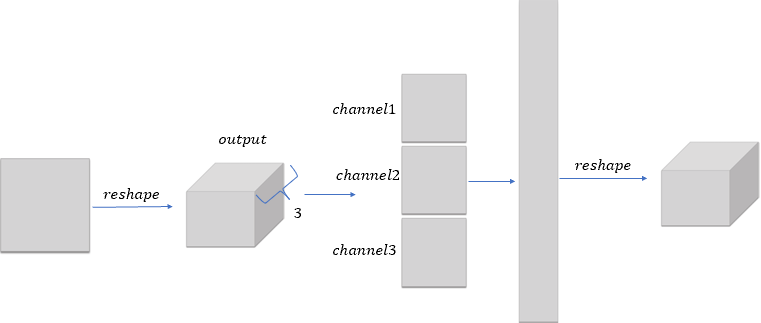

池化层的代码实现$\Rightarrow$

In [ ]:
class Pooling:
    from util import im2col
    import numpy as np
    def __init__(self,pooh_h,pool_w,stride=1,pad=0):
        self.pool_h=pool_h
        self.pool_w=pool_w
        self.stride=stride
        self.pad=pad
    def forward(self,x):
        N,C,H,W=x.shape
        out_h=int(1+(H-self.pool_h)/self.stride)
        out_w=int(1+(W-self.pool_w)/self.stride)
        col=im2col(x,self.pool_h,self.pool_w,self.stride,self.pad)#展开
        col=col.reshape(-1,self.pool_h*self.pool_w)
        out=np.max(col,axis=1)#纵向池化的过程
        out=out.reshape(N,out_h,out_w,C).transpose(0,3,1,2)
        return out

总的来说是：**1**.展开输入数据 **2**.求各行的最大值($np.max$)**3**.$reshape$和$transpose$成合适的输出大小

### **7.5   CNN的实现**

一个结构比较简单的$SimpleConvNet\rightarrow$

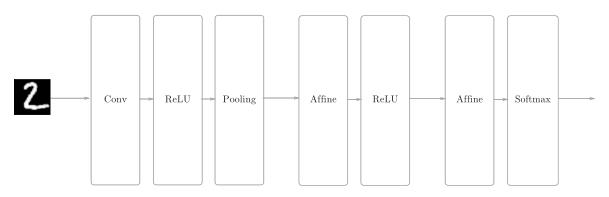

In [ ]:
import numpy as np
import collections
class SimpleConvNet:
    
    def __init__(self,input_dim=(1,28,28),
                 conv_param={'filter_num':30,'filter_size':5,
                             'pad':0,'stride':1},
                 hidden_size=100,output_size=10,weight_init_std=0.01):
        filter_num=conv_param['filter_num']
        filter_size=conv_param['filter_size']
        filter_pad=conv_param['pad']
        filter_stride=conv_param['stride']
        input_size=input_dim[1]
        conv_output_size=(input_size-filter_size+2*filter_pad)/(filter_stride+1)
        pool_output_size=int(filter_num*(conv_output_size/2)*(conv_output_size/2))
        #以上是卷积层结构的初始化
        self.params={}
        self.params['W1']=weight_init_std*\
             np.random.randn(filter_num,input_dim[0],filter_size,filter_size)
        self.params['b1']=np.zeros(hidden_size)
        self.params['W2']=weight_init_std*\
            np.random.randn(pool_output_size,hidden_size)
        self.params['b2']=np.zeros(hidden_size)
        self.params['W3']=weight_init_std*\
            np.random.randn(hidden_size,output_size)
        self.params['b3']=np.zeros(output_size)
        #以上是权重和阈值的初始化
        self.layers=collections.OrderedDict()
        self.layers['Conv1']=Convolution(self.params['W1'],self.params['b1'],conv_param['stride'],conv_param['pad'])
        self.layers['Relu1']=Relu()
        self.layers['Pool1']=Pooling(pool_h=2,pool_w=2,stride=2)
        self.layers['Affine1']=Affine(self.params['W2'],self.params['b2'])
        self.layers['Relu2']=Relu()
        self.layers['Affine2']=Affine(self.params['W3'],self.params['b3'])
        self.last_layer=softmaxwithloss()
        #以上是生成所有的层

定义前向传播和损失$\rightarrow$

In [ ]:
def predict(self,x):
    for layer in self.layers.values():
        x=layer.forward(x)
        return x
def loss(self,x,t):
    y=self.predic(x)
    return self.lastLayer.forward(y,t)

基于误差反向传播法求梯度$\rightarrow$

In [ ]:
def gradient(self,x,t):
    self.loss(x,t)
    dout=1
    dout=self.lastLayer.backward(dout)
    layers=list(self.layers.values())
    layser.reverse()
    for layer in layers:
        dout=layer.backward(dout)
    grads={}
    grads['W1']=self.layers['Conv1'].dW
    grads['b1']=self.layers['Conv1'].db
    grads['W2']=self.layers['Affine1'].dW
    grads['b2']=self.layers['Affine1'].db
    grads['W3']=self.layers['Affine2'].dW
    grads['b3']=self.layers['Affine2'].db
    return grads

### **7.6 CNN的可视化**

通过$matplolib$来展现卷积层的可视化，观察$CNN$的作用

### **7.6.1第一层权重的可视化**

以输入数据大小为(30,1,5,5)，过滤器为30个(1,5,5)大小的数据，学习前后的卷积核变化$\rightarrow$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from simple_convnet import SimpleConvNet

def filter_show(filters, nx=8, margin=3, scale=10):
    """
    c.f. https://gist.github.com/aidiary/07d530d5e08011832b12#file-draw_weight-py
    """
    FN, C, FH, FW = filters.shape
    ny = int(np.ceil(FN / nx))

    fig = plt.figure()
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

    for i in range(FN):
        ax = fig.add_subplot(ny, nx, i+1, xticks=[], yticks=[])
        ax.imshow(filters[i, 0], cmap=plt.cm.gray_r, interpolation='nearest')
    plt.show()


network = SimpleConvNet()
# 随机进行初始化后的权重
filter_show(network.params['W1'])

# 学习后的权重
network.load_params("params.pkl")
filter_show(network.params['W1'])

**学习前**的过滤器$\Rightarrow$

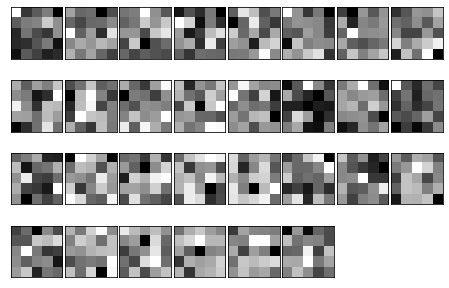

**学习后**的过滤器$\Rightarrow$

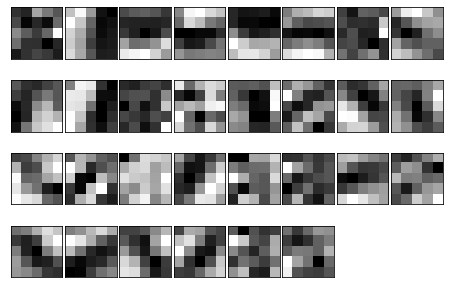

可以看出**学习**前的30个过滤器因为是随机初始化的，所以是黑白相间没什么规律<br>











**学习后**的30个滤波器能明显看出黑白渐变的分界线，含有块状区域的$knob$过滤器

这些具有明显边界信息特点的滤波器在卷积中会着重处理相同空间信息的部分$\rightarrow$

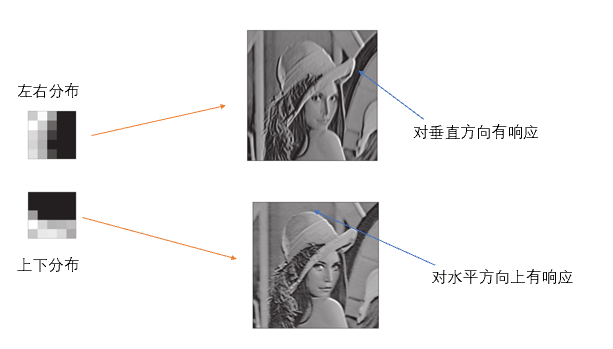

### **7.7  具有代表性的CNN**

首次提出$CNN$的元祖$Lenet$和首次运用深度学习的$Alexnet$

### **7.7.1 LeNet**

$LeNet$的范式：$Conv\rightarrow Subsampling \rightarrow Conv \rightarrow Subsampling   .....fullConnect\rightarrow output$

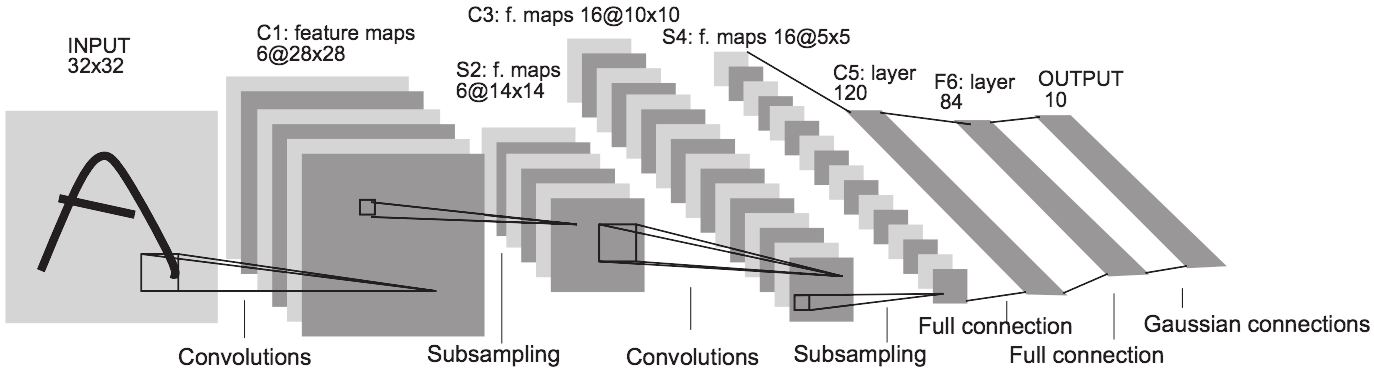

与$CNN$相比的不同之处：1.使用的激活函数为$Sigmoid$而非$ReLu$.2.$LetNet$使用下采样$subsampling$而$CNN$使用$pooling$

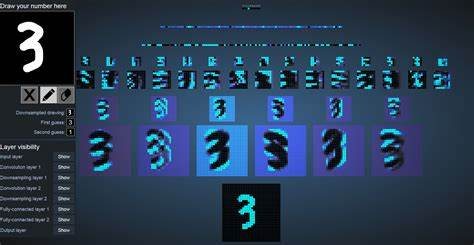

### **7.7.2 AlexNet**

$AlexNet$的范式与$CNN$基本相同:$Conv\rightarrow pooling \rightarrow Relu \rightarrow .... $

同时$AlexNet$加入了$dropout$和局部正规化$Local Response Normorallize$

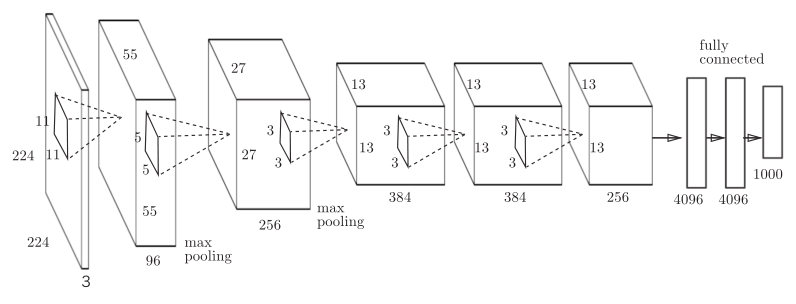

$AlexNet$结构框架中相比叠加着更多层，更加地"深入"

### **7.8 小结**

• CNN在此前的全连接层的网络中新增了卷积层和池化层。处理的数据均为4维<br><br>
• 使用 im2col 函数可以简单、高效地实现卷积层和池化层。卷积层中多通道同时展开，池化层中单通道展开<br><br>
• 通过CNN的可视化，可知随着层次变深，提取的信息愈加高级。过滤器在学习的过程中有明显的特征化，对特殊的方向有相对大的响应<br><br>
• LeNet和AlexNet是CNN的代表性网络。前者代表着$CNN$的运用，后者代表$Deep  Learning$的运用<br><br>
• 在深度学习的发展中，大数据和GPU做出了很大的贡献。<br><br>